In [ ]:
function solve_secular2(numVec,poles,c,ϵ)
    """ Solve the secular equation: return v solving
    sum(numVec[i]/(poles[i]-v)) = c
    """
    function find_secular_vector(v,numVec,poles)
        if v == 0
            w = float([-numVec[i]/(poles[i]) for i in 1:length(numVec)])
        else
            w = float([numVec[i]/(v - poles[i]) for i in 1:length(numVec)])
        end
        return w
    end
    
    function find_secular_derivative(v,numVec,poles)
        w = float([-numVec[i]/(v - poles[i])^2 for i in 1:length(numVec)])
        return sum(w)
    end
    
    solutions = Float64[]
    vectors = Array(Vector{Float64},0)
    
    for i in 1:length(poles)
        l = poles[i] # solution cannot be lower than this
        h = poles[i+1] # cannot be higher than this
        d = (l+h)/2
        v = poles[i] + d
        while 
        

In [5]:
using Interact, PyPlot
function find_secular_derivative(v,numVec,poles)
    w = float([-numVec[i]^2/(v - poles[i])^3 for i in 1:length(numVec)])
    return sum(w)
end
function find_secular_vector(v,numVec,poles)
    if v == 0
        w = float([-numVec[i]/(poles[i]) for i in 1:length(numVec)])
    else
        w = float([numVec[i]/(v - poles[i]) for i in 1:length(numVec)])
    end
    return w
end

find_secular_vector (generic function with 1 method)

Slider{Float64}([Input{Float64}] 1.5,"sldval",1.5,0.0:0.1:3.0)

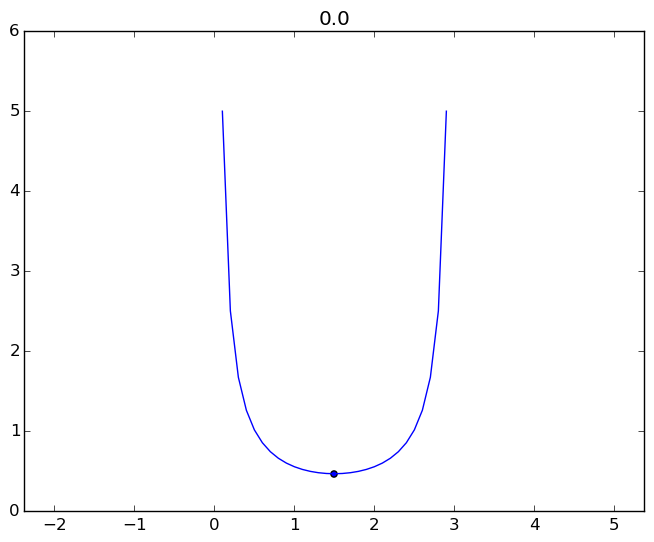

In [34]:
vv = [0:0.1:3]
poles = [0,3]
numVec = [0.5,0.5]
fig = figure()
ss = [norm(find_secular_vector(vv[i],numVec,poles)) for i in 1:length(vv)]
@manipulate for sldval in 0:0.1:3; withfig(fig) do
        plot(vv,ss)
        hold=true
        scatter(sldval,norm(find_secular_vector(sldval,numVec,poles)))
        title("$(round(find_secular_derivative(sldval,numVec,poles),4))")
        axis("equal")
    end
end

In [19]:
function find_interpole_min(p1,p2,numVec,poles,ϵ)
    """ Find the minimizing value of v between
    two poles.
    """
    d = p1+p2
    v = p1 + d/2.
    der = find_secular_derivative(v,numVec,poles)
    while abs(der) > ϵ
        d = d/2
        v = v - d*sign(der)/2.
        der = find_secular_derivative(v,numVec,poles)
    end
    return v,der
end

find_interpole_min (generic function with 1 method)

In [27]:
find_interpole_min(0,3,numVec,poles,1e-6)

elapsed time: 1.6319e-5 seconds (208 bytes allocated)


(1.5,0.0)

In [ ]:
# once we have the interpole min, we can perform binary search
# c > interpole min implies two solutions
# c == interpole min implies one solution
# c < interpole min implies no solutions

function search_min(p1,p2,numVec,poles,ϵ)
    """ Assume there are two solutions (c > interpole min)
    """
    

In [35]:
function gss(a,b,c,τ,f)
    φ = (1+sqrt(5))/2
    resphi = 2 - φ
    
    x = (c-b > b-a) ? b + resphi*(c-b) : b - resphi*(b-a)
    if abs(c-a) < τ*(abs(b) + abs(x))
        return (c+a)/2
    end
    assert(f(x) != f(b))
    if f(x) < f(b)
        if (c-b > b-a)
            gss(b,x,c,τ,f)
        else
            gss(a,x,b,τ,f)
        end
    else
        if (c-b > b-a)
            gss(a,b,x,τ,f)
        else
            gss(x,b,c,τ,f)
        end
    end
end

gss (generic function with 1 method)

In [49]:
f(x) = norm(find_secular_vector(x,numVec,poles))
τ = 1e-6

@time gss(poles[1],(poles[1] + poles[2])/2,poles[2],τ,f)

elapsed time: 0.004831519 seconds (44112 bytes allocated)


1.500000652258423

In [50]:
function gss(a,b,τ,f)
    φ = (sqrt(5) - 1)/2
    c = b - φ*(b-a)
    d = a + φ*(b-a)
    while abs(c-d) > τ
        if f(c) < f(d)
            b = d
            d = c
            c = b-φ*(b-a)
        else
            a = c
            c = d
            d = a+φ*(b-a)
        end
    end
    return (b+a)/2
end

gss2 (generic function with 1 method)

In [97]:
function gss(a,b,τ,f)
    φ = (sqrt(5) - 1)/2
    c = b - φ*(b-a)
    d = a + φ*(b-a)
    while abs(c-d) > τ
        if f(c) < f(d)
            b = d
            d = c
            c = b-φ*(b-a)
        else
            a = c
            c = d
            d = a+φ*(b-a)
        end
    end
    return (b+a)/2
end

function find_secular_vector(v,numVec,poles)
    if v == 0
        w = float([-numVec[i]/(poles[i]) for i in 1:length(numVec)])
    else
        w = float([numVec[i]/(v - poles[i]) for i in 1:length(numVec)])
    end
    return w
end

numVec = [0.5,0.5,0.5,0.5]
poles = [0,3,4,6]

# secular equation
s(v) = norm(find_secular_vector(v,numVec,poles))
c = 3.
ϵ = 1e-5
sols = Float64[]

for i in 1:length(poles) - 1
    min_v = gss(poles[i],poles[i+1],1e-5,s)
    if abs(min_v - c) < ϵ
        # one solution
        push!(sols,min_v)
        elseif min_v > c
        # two solutions
    else
        # zero solutions
        continue
    end
end